# Covid Exploratory Data analysis

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt

### Reading in all covid data

In [2]:
covid_data = pd.read_csv('Covid_19_data.csv')


In [3]:
covid_data.describe()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previous_day_adm

# Remarks about describe

1. On average hospitals with critical staffing shortage was at roughly 13
2. On average hospitals with no critical staffing shortages was at roughly 64
3. On average about 1093 beds were occupied on a given day in a state with people who have or are suspected of having covid
4. On average there were 16.8 covid deaths in all the hospitals

Interestingly, this data set includes not only data about patients, but also about which drugs were on supply and staffing shortages among other things.


## Only Wisconsin statistics

In [4]:
wisconsin_covid = covid_data.loc[covid_data['state'] == 'WI']

In [5]:
wisconsin_covid.head()
wisconsin_covid.shape

(677, 117)

### Converting date into datetime objects

In [6]:
wisconsin_covid['date'] = pd.to_datetime(wisconsin_covid['date'])

wisconsin_covid.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previ

### Sorting values by date

In [7]:
wisconsin_covid = wisconsin_covid.set_index('date')
wisconsin_covid = wisconsin_covid.sort_values(by='date')
wisconsin_covid.head(10)

,state,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previous_d

In [8]:
wisconsin_covid.shape

(677, 116)

### 677 makes sense, because it has been about two years since covid started

### Staffing shortages numbers

In [9]:
staffing_shortage_today = wisconsin_covid[['critical_staffing_shortage_today_yes']]

### Staffing shortages by day (regular)

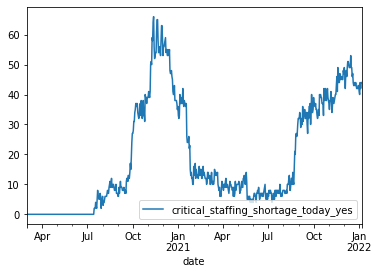

In [10]:
staffing_shortage_today['critical_staffing_shortage_today_yes'].plot(legend=True)

### Staffing shortages by week (resampled)

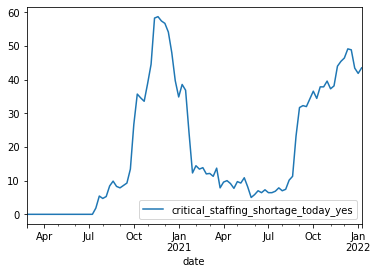

In [11]:
staff_short_week = staffing_shortage_today.resample('W').mean()
staff_short_week['critical_staffing_shortage_today_yes'].plot(legend=True)

### Staffing shortages by month (resampled)

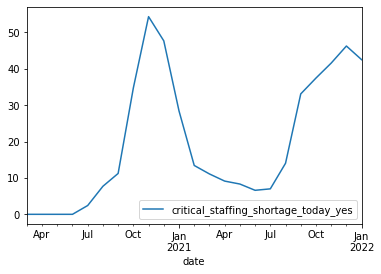

In [12]:
staff_short_month = staffing_shortage_today.resample('M').mean()
staff_short_month['critical_staffing_shortage_today_yes'].plot(legend=True)

## Observations on number of hospitals reporting critical staffing shortages

### In November 2020 many hospitals were experiencing staffing shortages. A similar trend was happening at the end of 2021, but the previous high was never reached and a downward trend is starting. A similar trend could possibly happen at the end of 2022, it will be interesting to see.
### Resampliung does smooth out the graph and helps identify the maxima and minima

### Critical Staffing Shortage reports together

In [13]:
shortage_reports = wisconsin_covid[['critical_staffing_shortage_today_yes',
                                    'critical_staffing_shortage_today_no',
                                    'critical_staffing_shortage_today_not_reported']]
shortage_reports.head()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported
date,,,
2020-03-01,0,0,1
2020-03-02,0,0,1
2020-03-03,0,0,1
2020-03-04,0,0,1
2020-03-05,0,0,1


### Graphing total shortage reports, shortage_today_yes, shortage_today_no, shortage_today_not_reported

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


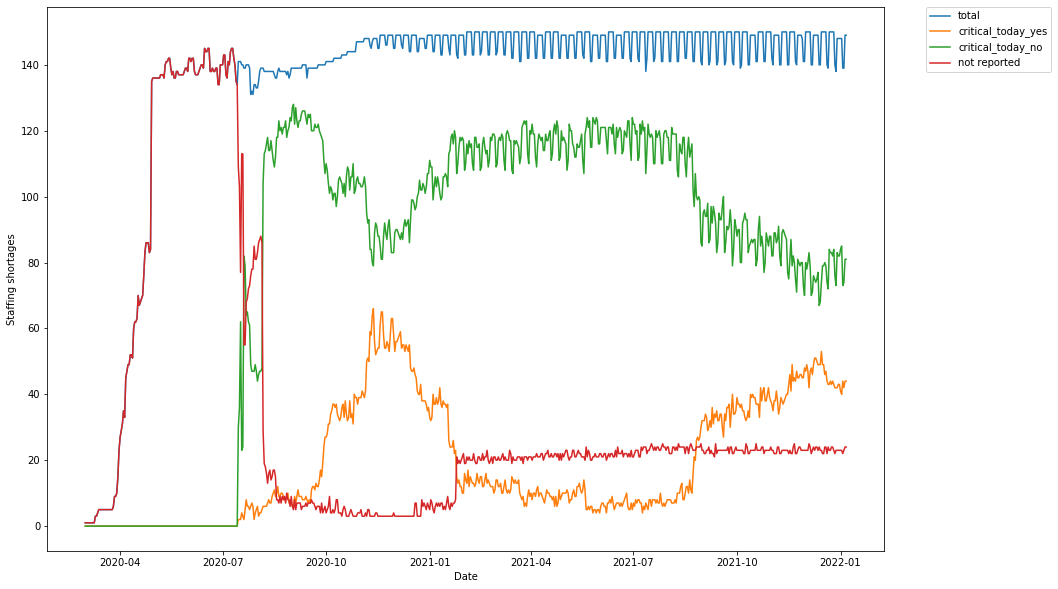

In [14]:
shortage_reports['total'] = (shortage_reports['critical_staffing_shortage_today_yes'] + 
                             shortage_reports['critical_staffing_shortage_today_no'] +
                             shortage_reports['critical_staffing_shortage_today_not_reported']).astype('int')


fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(shortage_reports['total'], label='total')
ax.plot(shortage_reports['critical_staffing_shortage_today_yes'], label='critical_today_yes')
ax.plot(shortage_reports['critical_staffing_shortage_today_no'], label='critical_today_no')
ax.plot(shortage_reports['critical_staffing_shortage_today_not_reported'], label='not reported')
ax.set_xlabel('Date')
ax.set_ylabel('Staffing shortages')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



## Is critical_staffing_shortage_today_not_reported correct?

By adding all the reports together of critical staffing shortages together (yes, no, not reported), we can see that the total stays relatively the same. Early on in the pandemic the data gathering wasn't very good yet, but starting in July of 2020, we can see that the total stays pretty much the same which means that the numbers provided are good. Critical staffing shortage not reported stays at a constant level from August 2020 - January 2021, which would probably indicate that some hospitals just stopped reporting this number. This number than rose in February 2021 and stayed the same til the end of the data which means even more hospitals gave up on reporting this data. We can also observe that when the critical staffing shortage today not reported metric changes, the other metrics move accordingly.

## Stacked Bar Graph Covid-19 admissions (Wisconsin)

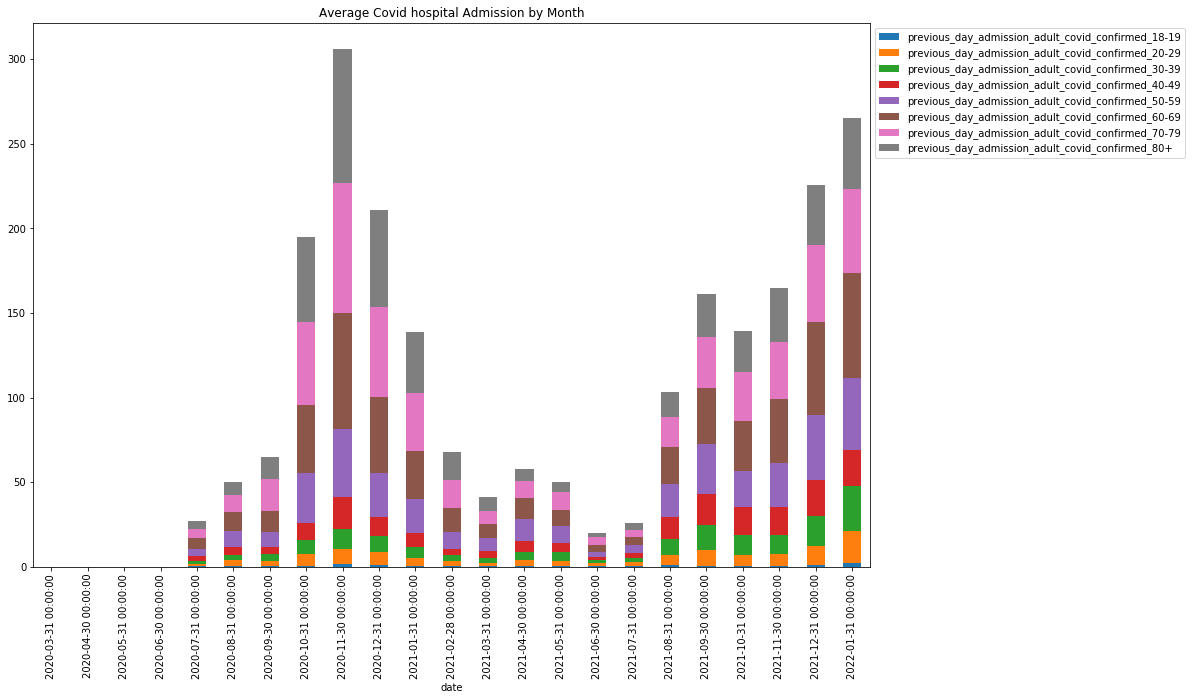

In [15]:
admission_data = wisconsin_covid[['previous_day_admission_adult_covid_confirmed_18-19',
                                  'previous_day_admission_adult_covid_confirmed_20-29',
                                 'previous_day_admission_adult_covid_confirmed_30-39',
                                  'previous_day_admission_adult_covid_confirmed_40-49',
                                 'previous_day_admission_adult_covid_confirmed_50-59',
                                  'previous_day_admission_adult_covid_confirmed_60-69',
                                 'previous_day_admission_adult_covid_confirmed_70-79',
                                  'previous_day_admission_adult_covid_confirmed_80+']]


admissions_18_19 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_18-19'].resample('M').mean())
admissions_20_29 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_20-29'].resample('M').mean())
admissions_30_39 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_30-39'].resample('M').mean())
admissions_40_49 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_40-49'].resample('M').mean())
admissions_50_59 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_50-59'].resample('M').mean())
admissions_60_69 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_60-69'].resample('M').mean())
admissions_70_79 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_70-79'].resample('M').mean())
admissions_80 = pd.DataFrame(admission_data['previous_day_admission_adult_covid_confirmed_80+'].resample('M').mean())


admissions_total_df = pd.concat([admissions_18_19, admissions_20_29,
                                 admissions_30_39, admissions_40_49,
                                 admissions_50_59, admissions_60_69,
                                 admissions_70_79, admissions_80], axis=1, join='inner')
f = plt.figure()
plt.title('Average Covid hospital Admission by Month', color='black')

admissions_total_df.plot(kind='bar', stacked=True, ax=f.gca(), figsize=(15, 10))
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()


# fig, ax = plt.subplots(figsize=(15, 10))
# plt.xticks(rotation=90)
# index = admissions_18_19.index 
# print(admissions_80)
# ax.bar(x=index, height=admissions_80, width=1, align='center')
# ax.bar(x=index, height=admissions_70_79, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_60_69, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_50_59, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_40_49, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_30_39, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_20_29, width=1, bottom=0, align='center')
# ax.bar(x=index, height=admissions_18_19, width=1, bottom=0, align='center')

### The above graph shows the average admissions per day for each month that data was available.



### Highest correlations with Covid Death calculation

In [16]:
wisconsin_covid_correlations = wisconsin_covid.corr(method='pearson', min_periods=1)

deaths_covid_correlations = wisconsin_covid_correlations['deaths_covid']
deaths_covid_correlations.sort_values(ascending= False)

deaths_covid                                                        1.000000
on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses        0.714189
previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used    0.685337
previous_day_admission_adult_covid_suspected                        0.633982
previous_week_therapeutic_a_casirivimab_imdevimab_courses_used      0.569229
                                                                      ...   
adult_icu_bed_utilization_coverage                                 -0.334902
critical_staffing_shortage_anticipated_within_week_not_reported    -0.345469
critical_staffing_shortage_today_not_reported                      -0.381423
on_hand_supply_therapeutic_b_bamlanivimab_courses                  -0.446292
geocoded_state                                                           NaN
Name: deaths_covid, Length: 115, dtype: float64

## Highest Correlations with covid death:
### Top three Correlations:
### 1. on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses 71%
### 2. previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used 68%
### 3. previous_day_admission_adult_covid_suspected 63%
Obviously the first metric, on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses can be thrown away, because having a supply of something doesn't kill people, using it does, which is the second metric.

Causal Relationships are very hard to prove, especially when there are a lot of confounding factors. Reading up on bamlanivimab and etesevimab, it seems as though these drugs get used in the later end of covid as a sort of last ditch effort. It is only authorized to be used in people that are not fully vaccinated and are likely to not be able to mount a full immune response (healthy user bias). It is likely, that these people were going to die regardless and the drug was a last attempt. 
Obviously the first metric, on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses can be thrown away, because having a supply of something doesn't kill people, using it does, which is the second metric.

The last metric,previous_day_admission_adult_covid_suspected is quite interesting and to me seems like the most probable causal relationship. If you are getting admitted to the hospital with suspected covid, it is likely that you are having some serious symptoms of which some could certainly cause death. As one can see, the previous_day_admission_adult_covid_suspected is only 63% correlated, which is not that closely correlated, but to me seems like closest to a causal relationship. 



### Cross correlation function with lag between two series

In [17]:
def cross_corr(df_x, df_y, lag=0):
    '''
    This is a lagging cross correlation fucntion
    param: df_x = series
    param: df_y = series2
    param: lag = int (how many days difference)
    return: correlation between the two series
    '''
    df_x = df_x.shift(periods=lag)
    diction = {'df_x': df_x,'df_y': df_y}
    corr = pd.DataFrame(diction)
    selected_rows = corr[~corr['df_y'].isnull()]
    correlation = selected_rows.corr(method='pearson', min_periods=1)
   
    
    return correlation['df_y'][0] * 100
    

### Correlation between previous day admission and staffed adult bed occupancy

{0: 73.59303932411204, 1: 73.48398214267989, 2: 72.9974259594813, 3: 72.9053095028044, 4: 73.97593886235587, 5: 75.75610474424096, 6: 77.34324761803241, 7: 78.66685742987059, 8: 78.24782861095852, 9: 77.1419511888348, 10: 75.57112720476937, 11: 74.69135170906472, 12: 74.96129272081879, 13: 75.54914341632475, 14: 75.3247309064651, 15: 73.46413864226375, 16: 71.25310626396924, 17: 69.83269957243806, 18: 68.84787304194566, 19: 68.50702195095262, 20: 68.59958817345039, 21: 68.06023619622621, 22: 65.80443545175247, 23: 63.10600007202286, 24: 61.37133754713755, 25: 59.9497930612811, 26: 59.321307472071936, 27: 59.205209361970134, 28: 58.41913807785978, 29: 55.93932557657318, 30: 53.10793144151293, 31: 50.881347006942725, 32: 49.07105633761068, 33: 48.13869245687425, 34: 47.61914253022334, 35: 46.89419371130995, 36: 44.19295932233025, 37: 41.21607973522378, 38: 38.97054894059872, 39: 36.955648310281056, 40: 36.021323265688245}


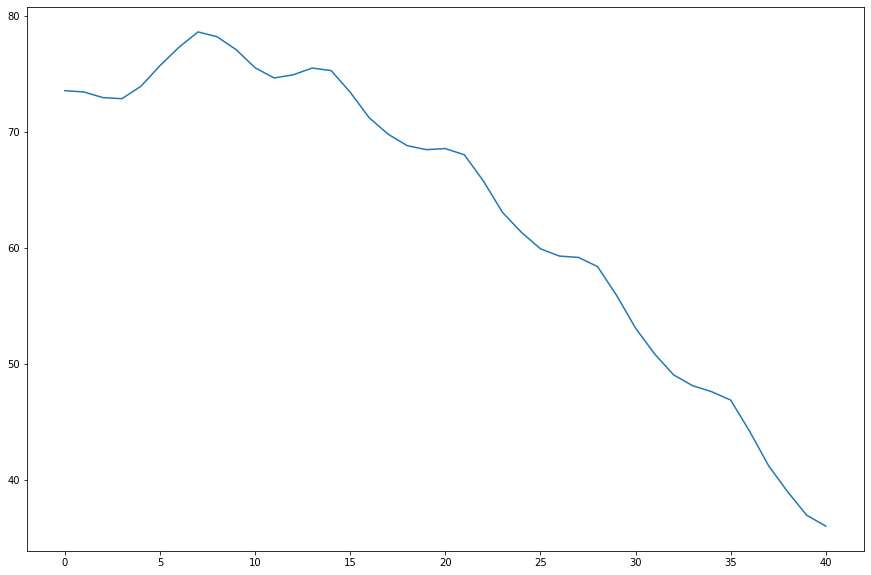

In [18]:
wisconsin_covid_icu_bed = wisconsin_covid['staffed_adult_icu_bed_occupancy']
wisconsin_covid_previous_day_admission = wisconsin_covid['previous_day_admission_adult_covid_confirmed']
lag_corr = dict()
for i in range(0, 41):
    corr = cross_corr(wisconsin_covid_previous_day_admission, wisconsin_covid_icu_bed, i)
    lag_corr[i] = corr
lists = sorted(lag_corr.items())
x, y = zip(*lists)
print(lag_corr)
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, y)

### Highest correlation between staffed adult bed occupancy and previous day admission is on day 7 which means that people are most likely getting admitted early on when they have covid and then as the disease progresses more and more people need to be admitted to the icu because there symptoms get worse and then after 7 days, people start to slowly leave the icu and start feeling better.

In [19]:
### End of NoteBook ###